In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


та
препоръчвам да имплементирате PCA върху синтетични данни. Много често избираме 2D точки с форма на елипса, на която PCA трябва да намери òсите (fig. 1 https://www.visiondummy.com/2014/04/draw-error-ellipse-representing-covariance-matrix/)
PCA има различни начини за имплементиране: този, който е описан в моя примерен проект, е с eigenvalue decomposition. По-лесен е за разбиране, но не работи добре в някои по-сложни ситуации. В интернет ще намерите повече инфо за PCA чрез SVD (singular value decomposition), което е мъничко по-сложно, но доста по-добро за реални данни
точка 7 предлагам да я пропуснете, а да замените с PCA върху лесни / синтетични данни; и след това с едни реални. Ако я направите - ще е супер. Ако нямате време - отървете се от нея
PCA ще Ви научи на много неща за ML и за линейна алгебра
може да сравните с референтна имплементация from sklearn.decomposition import PCA -> трябва да дава същите, или сравними резултати с Вашите (няма да са съвсем еднакви, но това ще Ви оставя да разберете как и защо е)


# Principal Component Analysis
#### What is 
**Principal Component Analysis (PCA)** is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation. It works by transforming the original features into a new set of uncorrelated features called *principal components*, which capture most of the variability in the data.

![PCA](PCA.webp)

PCA is centered on identifying the primary directions of **maximum variance** within the data. These high-variance directions typically signify the signal, while low-variance directions tend to reflect noise. By retaining the most significant principal components, PCA can filter out noise and highlight the underlying patterns in the data. 

PCA falls in the unsupervised branch of machine learning which uses **orthogonal linear transformation** based on the eigenvector and eigenvalue decomposition of the covariance matrix. [[1](https://www.datacamp.com/tutorial/principal-component-analysis-in-python)][[2](https://medium.com/@niranjan.appaji/addressing-the-curse-of-dimensionality-unveiling-pcas-power-247956bc9a4d#:~:text=The%20curse%20of%20dimensionality%20refers,as%20we%20add%20more%20dimensions.)][[3](https://medium.com/codex/principle-component-analysis-pca-simplified-with-implementation-a05eb86084f8)].


PCA will be more useful when the variables are strongly correlated because the combined variable will then contain more information of the variables, compared to if the variables show a weak correlation to each othe4. [[3](https://www.youtube.com/watch?v=dz8imS1vwIM)

#### Why it is useful?

PCA is useful for reducing the dimensionality of the data while retaining as much information as possible. Reducing dimensionality can lead to simpler models, reduced computational complexity, and improved generalization to new, unseen data. In addition, utilizing a model trained on a reduced set of principal components typically demands fewer computational resources and less time, leading to enhanced overall model performace.


**The curse of dimensionality** refers to the increasing amount of data required to effectively fill space as the number of dimensions g rows.For exmplen, eight points may fill a one-dimensional space well, but their distance from each other becomes more noticeable as we add more dimensions. In a 10 or more dimensional space, these points would be even more widely dispersed:

Selecting inputs, which involves reducing the number of inputs, is an evident strategy to counteract the curse of dimensionality. However, diminishing the dimensionality is also a straightforward method to overlook crucial inform The main rationale for excluding a variable is its redundancy, specifically, the presence of multicollinearity among variables. [[3](https://medium.com/@niranjan.appaji/addressing-the-curse-of-dimensionality-unveiling-pcas-power-247956bc9a4d#:~:text=The%20curse%20of%20dimensionality%20refers,as%20we%20add%20more%20dimensions.)])]ns.)])]



### Eigenvalue Decomposition PCA Demo

We can summarize the **basic steps** of PCA as below:1. Standardization of data
2. Computation of Covariance Matrix
3. Calculation of Eigenvector and Eigenvalue
4. Selection of number of Principal Components
5. Multiplication of principal components with original data to create the newly transformed data set.set.

Let's demonstrate the technique in Python on a simple synthetic dataset that presents a correlation between salary and expenses. We will generate the dataset as a *NumPy array* and then create a *DataFrame* using *Pandas*:

In [2]:
# Creating a dummy dataset
data = np.array([[1000, 500],[2000, 800],[3000, 1100],[4000, 1500],[5000,1800],[8000, 1900]])
# Creating a dataframe
df = pd.DataFrame(data,columns = ['Salary','Expense'])

In [3]:
df

,Salary,Expense
0,1000,500
1,2000,800
2,3000,1100
3,4000,1500
4,5000,1800
5,8000,1900


Let's visualize the dataset by a scatterplot using a regression line to show the correlation using *Seaborn*:e")

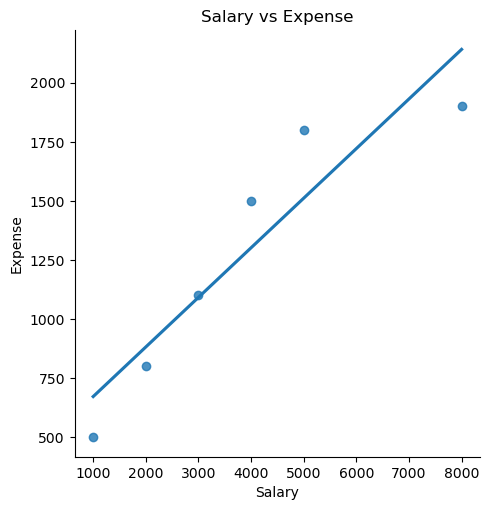

In [6]:
# Create a scatter plot with a regression line to show the correlation
plot = sns.lmplot(x = 'Salary', y = 'Expense', data = df, ci = None)
plt.title("Salary vs Expense")
plt.xlabel('Salary')
plt.ylabel('Expense')
plt.show()

Now we can proceed with the first step:

### 1. Standardization of datadata

As PCA will calculate a new projection of our dataset in which the new axes are based on the standard deviation of our variables. So a variable with a high standard deviation will have a higher weight for the calculation of the axes than a variable with a low standard deviation. This is the reason why we need to normalize the data that all variables have the same standard deviation.

To standardize a variable, we subtract the corresponding mean from all values of the variable, which will result in centered data. Then we divide the centered data by the standard deviation of the corresponding variable, which will give us the standardized variable: 
$$ z = \frac{x - \mu}{\sigma}$$

By standardizing the variables, we transformed them to have a mean of 0 and a standard deviation of 1. 

To implementis in the code, we use will *pandas*, as it is closer to implementation the math, while standardization is usully done  using *StandardScaler*, *RobustScaler*, or *MinMaxScaler* of the sklearn library.




In [16]:
# Calculate the mean of each column
mean_salary = df['Salary'].mean()
mean_expense = df['Expense'].mean()

# Calculate the standard deviation of each column
std_salary = df['Salary'].std()
std_expense = df['Expense'].std()

# Standardize the columns
df['Salary Standardized'] = (df['Salary'] - mean_salary) / std_salary
df['Expense Standardized'] = (df['Expense'] - mean_expense) / std_expense

In [17]:
df

,Salary,Expense,Salary_standardized,Expense_standardized,Salary Standardized,Expense Standardized
0,1000,500,-1.140965,-1.366725,-1.140965,-1.366725
1,2000,800,-0.738272,-0.831920,-0.738272,-0.831920
2,3000,1100,-0.335578,-0.297114,-0.335578,-0.297114
3,4000,1500,0.067116,0.415960,0.067116,0.415960
4,5000,1800,0.469809,0.950765,0.469809,0.950765
5,8000,1900,1.677890,1.129034,1.677890,1.129034


In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()

# Create a DataFrame from the iris data
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the class column to the DataFrame
df['class'] = iris.target

# Display the DataFrame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
x = df.drop(labels='class', axis=1).values
y = df['class'].values

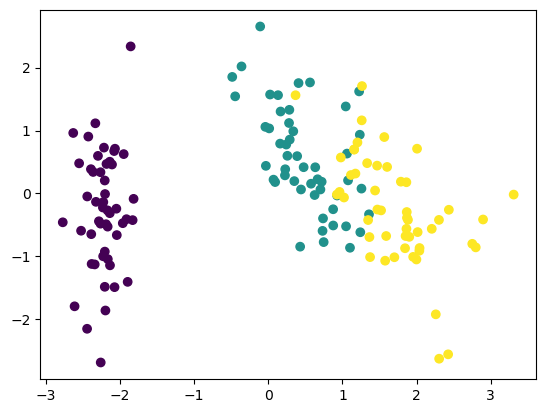

In [12]:
class convers_pca():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None
        
    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)
    
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean
    
    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)
        
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T
        
        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]
        self.explained_variance = self.eigen_values[self.sorted_components]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()

std = StandardScaler()
transformed = StandardScaler().fit_transform(x)
pca = convers_pca(no_of_components=2)
pca.fit(transformed)

x_std = pca.transform(transformed)
plt.figure()
plt.scatter(x_std[:, 0], x_std[:, 1], c=y)

Principal components from confidence ellipse (first 5 rows):
[[ 2.68412563e+00  3.19397247e-01  2.79148276e-02  2.26243707e-03]
 [ 2.71414169e+00 -1.77001225e-01  2.10464272e-01  9.90265503e-02]
 [ 2.88899057e+00 -1.44949426e-01 -1.79002563e-02  1.99683897e-02]
 [ 2.74534286e+00 -3.18298979e-01 -3.15593736e-02 -7.55758166e-02]
 [ 2.72871654e+00  3.26754513e-01 -9.00792406e-02 -6.12585926e-02]]

Principal components from sklearn PCA (first 5 rows):
[[-2.68412563e+00  3.19397247e-01 -2.79148276e-02 -2.26243707e-03]
 [-2.71414169e+00 -1.77001225e-01 -2.10464272e-01 -9.90265503e-02]
 [-2.88899057e+00 -1.44949426e-01  1.79002563e-02 -1.99683897e-02]
 [-2.74534286e+00 -3.18298979e-01  3.15593736e-02  7.55758166e-02]
 [-2.72871654e+00  3.26754513e-01  9.00792406e-02  6.12585926e-02]]

Explained variance ratio from confidence ellipse:
[0.92461872 0.05306648 0.01710261 0.00521218]

Explained variance ratio from sklearn PCA:
[0.92461872 0.05306648 0.01710261 0.00521218]


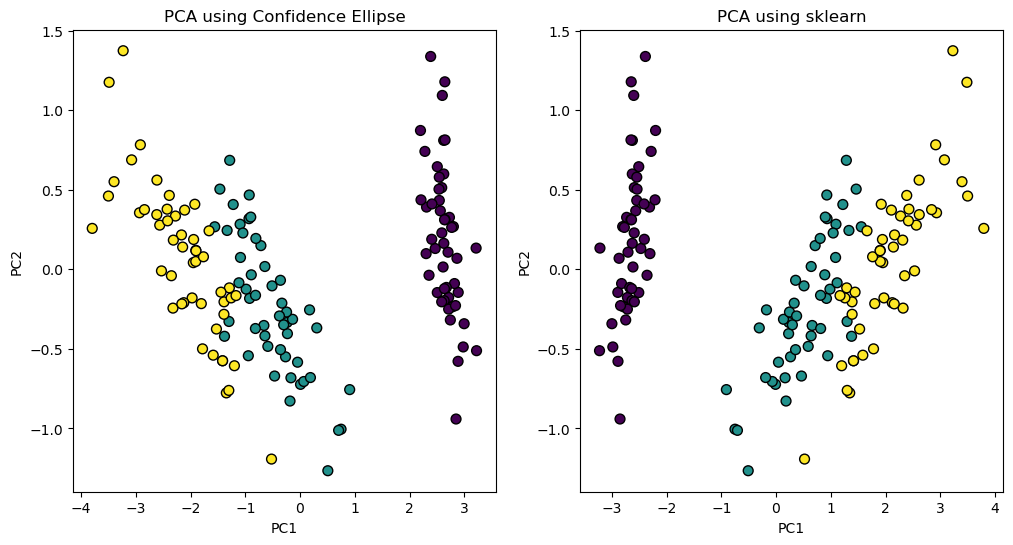

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 1: Center the data
X_centered = X - np.mean(X, axis=0)

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Step 3: Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

# Step 5: Transform the data
PCs_ellipse = np.dot(X_centered, sorted_eigenvectors)

# For comparison, let's perform PCA using sklearn
from sklearn.decomposition import PCA

# Initialize PCA and fit the data
pca = PCA()
PCs_sklearn = pca.fit_transform(X)

# Compare the principal components
print("Principal components from confidence ellipse (first 5 rows):")
print(PCs_ellipse[:5])

print("\nPrincipal components from sklearn PCA (first 5 rows):")
print(PCs_sklearn[:5])

# Compare explained variance
explained_variance_ellipse = sorted_eigenvalues / sorted_eigenvalues.sum()

print("\nExplained variance ratio from confidence ellipse:")
print(explained_variance_ellipse)

print("\nExplained variance ratio from sklearn PCA:")
print(pca.explained_variance_ratio_)

# Plot the results for visual comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(PCs_ellipse[:, 0], PCs_ellipse[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA using Confidence Ellipse')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 2, 2)
plt.scatter(PCs_sklearn[:, 0], PCs_sklearn[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA using sklearn')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()
